<a href="https://colab.research.google.com/github/TanveerCU/Training-ML-models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/TanveerCU/Training-Data.git
import os
import cv2 as cv
!apt install unzip
!unzip "./Training-Data/data.zip"
!unzip "./Training-Data/alphabet.zip"

# **DIGITS ONLY**

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./data/zero")
i=1

for file in List:
  file="./data/zero/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(0)
  i+=1
print(i)


List = os.listdir("./data/one")
i=1
for file in List:
  file="./data/one/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(1)
  i+=1
print(i)



List = os.listdir("./data/two")
i=1

for file in List:
  file="./data/two/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(2)
  i+=1
print(i)



List = os.listdir("./data/three")
i=1

for file in List:
  file="./data/three/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(3)
  i+=1

print(i)
len(train_images)

List = os.listdir("./data/four")
i=1

for file in List:
  file="./data/four/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(4)

  i+=1

print(i)


List = os.listdir("./data/five")
i=1

for file in List:
  file="./data/five/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(5)

  i+=1

print(i)



List = os.listdir("./data/six")
i=1
#print(len(List))
for file in List:
  file="./data/six/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(6)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/seven")
i=1
#print(len(List))
for file in List:
  file="./data/seven/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(7)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/eight")
i=1
#print(len(List))
for file in List:
  file="./data/eight/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(8)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/nine")
i=1
#print(len(List))
for file in List:
  file="./data/nine/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(9)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

4957
6454
6559
5977
4542
3382
3757
4129
3895
4180


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

47822


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(47822, 32, 32)
(47822,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

40648
7174


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (40648, 1024)
X test flatten (7174, 1024)


In [ ]:
from sklearn.svm import SVC
clf=SVC(gamma=0.001,C=100)
#clf=SVC(C=1,kernel="linear",max_iter=5000)

In [ ]:
clf.fit(x_train_flatten, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.9577641483133538


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[706  14   4   5   5   1   2   1   0   0]
 [  5 970   6   2   1   1   0   0   0   5]
 [  2   1 961   0   1   1   4   0   0   6]
 [ 20  11   3 862   2   6   0   6   2   1]
 [  4   1   2   3 691   3   4   3   3   1]
 [ 11   3   4  12   4 494   2   1   0   0]
 [  3   1  12   4   1   2 500   3   3   3]
 [  3   1   2   1   5   1   0 597   1   0]
 [  1   2   3   1   4   3  14   2 522   2]
 [  5  14   8   4   1   2   3   2   7 568]]


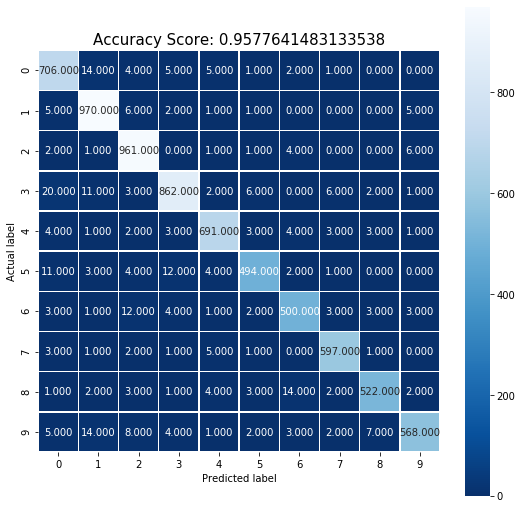

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# CHAR ONLY 

In [ ]:
import os
import cv2 as cv

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./alphabet/ko")
i=1

for file in List:
  file="./alphabet/ko/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(10)
  i+=1
print(i)


List = os.listdir("./alphabet/kho")
i=1
for file in List:
  file="./alphabet/kho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(11)
  i+=1
print(i)



List = os.listdir("./alphabet/go")
i=1

for file in List:
  file="./alphabet/go/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(12)
  i+=1
print(i)



List = os.listdir("./alphabet/gho")
i=1

for file in List:
  file="./alphabet/gho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(13)
  i+=1

print(i)
len(train_images)

List = os.listdir("./alphabet/cho")
i=1

for file in List:
  file="./alphabet/cho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(14)

  i+=1

print(i)


List = os.listdir("./alphabet/jo")
i=1

for file in List:
  file="./alphabet/jo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(15)

  i+=1

print(i)



List = os.listdir("./alphabet/dho")
i=1
#print(len(List))
for file in List:
  file="./alphabet/dho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(16)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/lo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/lo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(17)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/mo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/mo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(18)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/vo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/vo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(19)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

22433
1959
23460
1953
1973
1967
22427
1956
22422
1966


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

102506


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(102506, 32, 32)
(102506,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

87130
15376


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (87130, 1024)
X test flatten (15376, 1024)


In [ ]:
from sklearn.svm import SVC
clf=SVC(gamma=0.001,C=100)

In [ ]:
clf.fit(x_train_flatten, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.9510275754422477


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[3314    7   12    3    2    9    2    4   10   12]
 [   1  219    8   20    0    3    0    5   14    2]
 [   8   17 3509    9    1    4    2   12   13    4]
 [   5   25   17  187    4    3    3    2   29    6]
 [   2    1    3    1  237    7   38    3    6    6]
 [  20    9    8    8    6  222    2    4    7   17]
 [   2    1   12    6   58    2 3301    0    1    4]
 [   7    8   10   10    6    4    1  249   13    1]
 [  14   20   11   42    6    2    3   17 3160    4]
 [  15    8    5    5    6   16    3    1    3  225]]


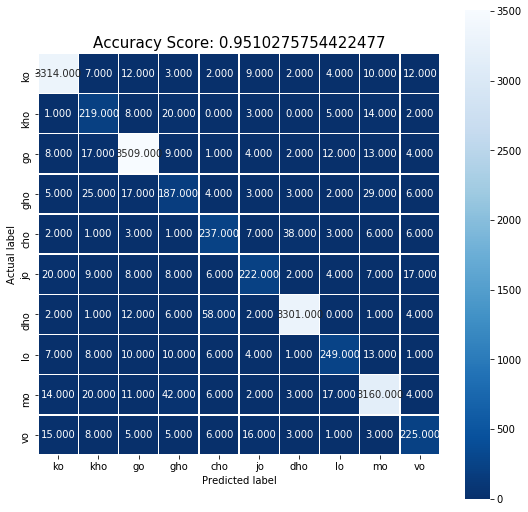

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index=["ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"], columns=["ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"])
plt.figure(figsize=(9,9))
sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
                     

# **BOTH**

In [ ]:
train_images=[]
train_labels=[]
List = os.listdir("./data/zero")
i=1

for file in List:
  file="./data/zero/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(0)
  i+=1
print(i)


List = os.listdir("./data/one")
i=1
for file in List:
  file="./data/one/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(1)
  i+=1
print(i)



List = os.listdir("./data/two")
i=1

for file in List:
  file="./data/two/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(2)
  i+=1
print(i)



List = os.listdir("./data/three")
i=1

for file in List:
  file="./data/three/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(3)
  i+=1

print(i)
len(train_images)

List = os.listdir("./data/four")
i=1

for file in List:
  file="./data/four/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(4)

  i+=1

print(i)


List = os.listdir("./data/five")
i=1

for file in List:
  file="./data/five/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(5)

  i+=1

print(i)



List = os.listdir("./data/six")
i=1
#print(len(List))
for file in List:
  file="./data/six/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(6)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/seven")
i=1
#print(len(List))
for file in List:
  file="./data/seven/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(7)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/eight")
i=1
#print(len(List))
for file in List:
  file="./data/eight/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(8)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./data/nine")
i=1
#print(len(List))
for file in List:
  file="./data/nine/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(9)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)


List = os.listdir("./alphabet/ko")
i=1

for file in List:
  file="./alphabet/ko/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(10)
  i+=1
print(i)


List = os.listdir("./alphabet/kho")
i=1
for file in List:
  file="./alphabet/kho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(11)
  i+=1
print(i)



List = os.listdir("./alphabet/go")
i=1

for file in List:
  file="./alphabet/go/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(12)
  i+=1
print(i)



List = os.listdir("./alphabet/gho")
i=1

for file in List:
  file="./alphabet/gho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(13)
  i+=1

print(i)
len(train_images)

List = os.listdir("./alphabet/cho")
i=1

for file in List:
  file="./alphabet/cho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(14)

  i+=1

print(i)


List = os.listdir("./alphabet/jo")
i=1

for file in List:
  file="./alphabet/jo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(15)

  i+=1

print(i)



List = os.listdir("./alphabet/dho")
i=1
#print(len(List))
for file in List:
  file="./alphabet/dho/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(16)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/lo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/lo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(17)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/mo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/mo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(18)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)



List = os.listdir("./alphabet/vo")
i=1
#print(len(List))
for file in List:
  file="./alphabet/vo/"+file
  pic=cv.imread(file,0)
  train_images.append(pic)
  train_labels.append(19)
#  print("one: "+(str)(i))
  i+=1
#print(len(List))
#print(len(train_images))
print(i)

4957
6454
6559
5977
4542
3382
3757
4129
3895
4180
1973
1959
13230
1953
1973
1967
12197
1956
1962
1966


In [ ]:
import numpy as np
print(len(train_images))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
train_images = train_images / 255.0

88948


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(88948, 32, 32)
(88948,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
print(number_of_train)
print(number_of_test)

75605
13343


In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (75605, 1024)
X test flatten (13343, 1024)


In [ ]:
from sklearn.svm import SVC
clf=SVC(gamma=0.001,C=100)

In [ ]:
clf.fit(x_train_flatten, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = clf.predict(x_test_flatten)

In [ ]:
score = clf.score(x_test_flatten, y_test)
print(score)

0.9197331934347598


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 678   10    6    6    1    1    3    4    0    0    0    0    2    0
     0    0    2    0    0    0]
 [   7  937    6    0    1    0    0    0    0    6    0    0    0    0
     0    0    1    0    0    0]
 [   2    1  989    0    1    0    0    1    1    8    0    0    2    0
     0    0    1    0    0    0]
 [  17   12    1  855    0    5    0    1    0    0    0    0    2    0
     0    0    2    0    0    0]
 [   8    3    2    2  614    6    2    4    2    1    0    0    2    0
     0    0    0    0    0    0]
 [   3    2    2    9    4  491    0    2    0    0    0    0    1    0
     0    0    1    0    0    0]
 [   2    1   12    1    0    2  555    2    7    1    0    0    0    0
     0    0    1    0    0    0]
 [   5    4    1    0    3    1    1  630    0    0    0    0    1    0
     0    0    0    0    0    0]
 [   0    0    1    0    4    0    6    1  542    3    0    0    0    0
     0    0    0    0    0    0]
 [   6   14    7    0    2    4    1    4    4  587    

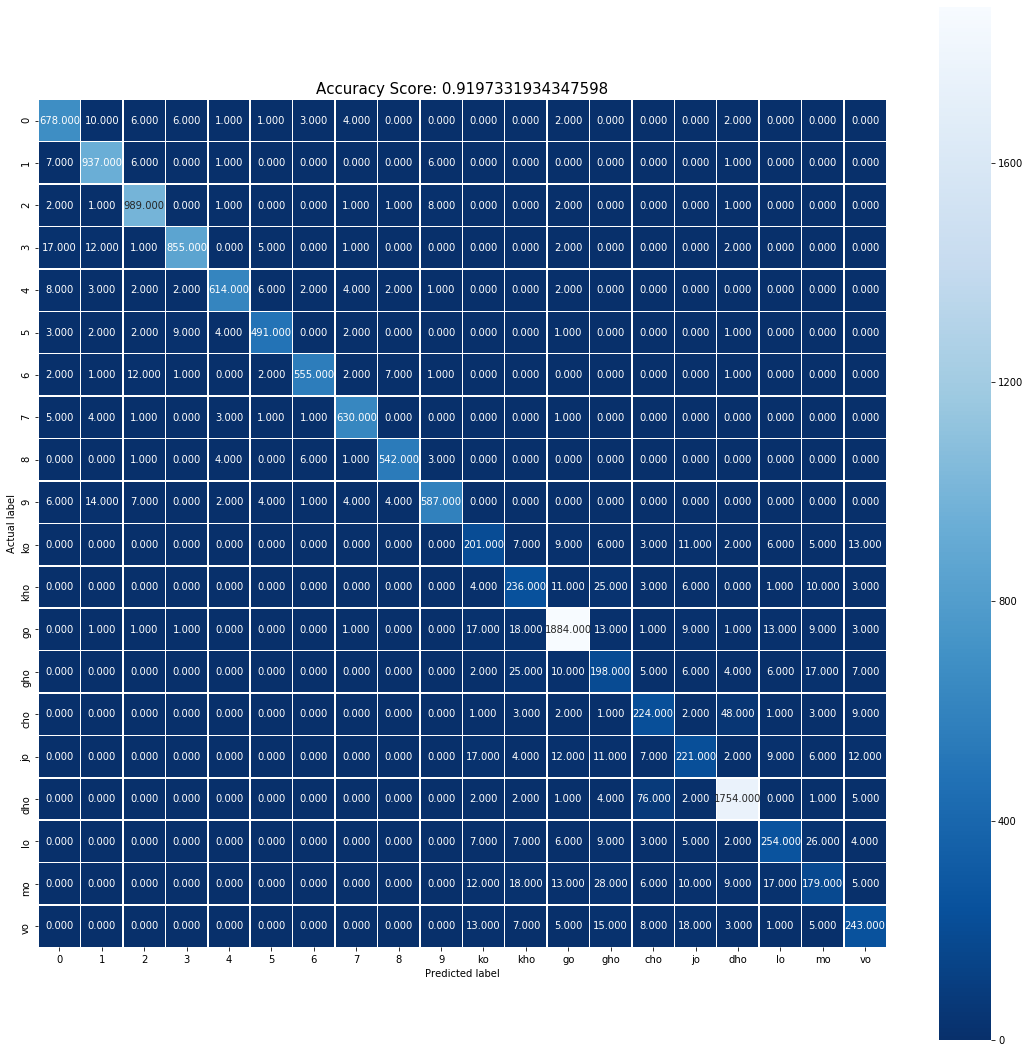

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index=["0","1","2","3","4","5","6","7","8","9","ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"], columns=["0","1","2","3","4","5","6","7","8","9","ko", "kho", "go", "gho" , "cho", "jo" , "dho", "lo", "mo", "vo"])
plt.figure(figsize=(19,19))
sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
                     